**Import Libraries**

---



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load the Data**

---



In [30]:
pcos = pd.read_csv(r'/content/drive/MyDrive/projects-sem6/PCOS_data.csv')
pcos.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


**Inspect the Data**

---



In [31]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

**Two columns are of object(string) type, change it to numeric**

---



In [32]:
for i in ['AMH(ng/mL)', 'II    beta-HCG(mIU/mL)']:
    pcos[i] = pd.to_numeric(pcos[i], errors='coerce')

Remove columns 'Sl. No', 'Patient File No.', 'Unnamed: 44' that do not have impact on the result.

In [33]:
pcos = pcos.drop(['Sl. No', 'Patient File No.', 'Unnamed: 44'], axis =1)
target = pcos.columns[:1].to_list()
features = pcos.columns[1:].to_list()
print("Total number of Features:", len(features))

Total number of Features: 41


Check for any missing Values or NaN values

In [34]:
pcos.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

Since the number of missing values is very low compared to the total record we can directly remove them.

In [35]:
pcos = pcos.dropna()
print("Total number of Features:", len(features))

Total number of Features: 41


**Chi Square Test**

---



Out of the 41 features, all the features might not influence the prediction. If we use all of them there could be a chance of overfitting. Thus we find a need for feature selection to identify top 30 parameters that influence our predition result. Hence we will use the Chi Square method to determine important features.

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

num = 30

bestfeatures = SelectKBest(score_func=chi2, k=num)
fit = bestfeatures.fit(pcos[features], pcos[target])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(pcos.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values(by='Score', ascending = False)
featureScores = featureScores[featureScores.Feature != target[0]]
featureScores = featureScores.reset_index(drop = True)
featureScores[:num]

,Feature,Score
0,PRL(ng/mL),9600.594045
1,No. of abortions,6899.358709
2,FSH(mIU/mL),2572.753526
3,II beta-HCG(mIU/mL),1592.273459
4,I beta-HCG(mIU/mL),1012.628577
5,Follicle No. (L),673.143812
6,BP _Diastolic (mmHg),564.595226
7,TSH (mIU/L),221.815736
8,LH(mIU/mL),96.235867
9,hair growth(Y/N),85.664994


In [37]:
new_features = featureScores['Feature'].to_list()
new_features = new_features[:num]
new_features

['PRL(ng/mL)',
 'No. of abortions',
 'FSH(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 '  I   beta-HCG(mIU/mL)',
 'Follicle No. (L)',
 'BP _Diastolic (mmHg)',
 'TSH (mIU/L)',
 'LH(mIU/mL)',
 'hair growth(Y/N)',
 'Weight gain(Y/N)',
 'RBS(mg/dl)',
 ' Age (yrs)',
 'Pimples(Y/N)',
 'Hb(g/dl)',
 'Vit D3 (ng/mL)',
 'Hair loss(Y/N)',
 'Cycle length(days)',
 'Height(Cm) ',
 'Skin darkening (Y/N)',
 'Cycle(R/I)',
 'Follicle No. (R)',
 'FSH/LH',
 'Hip(inch)',
 'PRG(ng/mL)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Pregnant(Y/N)',
 'Fast food (Y/N)',
 'Blood Group']

**Data Transformation - Chi Square**

---



In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, new_features)])

In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split

**Model Training - Chi Square**

---



In [40]:
train, test = train_test_split(pcos, test_size = 0.2, random_state = 0)

observations = pd.DataFrame()
classifier = 'RandomForestClassifier'
model =  RandomForestClassifier(n_estimators=200, random_state=0)

cv = KFold(n_splits=5, random_state=0, shuffle=True)
pipe = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
observations[classifier] = (cross_val_score(pipe, train[new_features], np.ravel(train[target]), scoring='accuracy', cv=cv))

**Evaluation - Chi Square**

---



In [41]:
mean = pd.DataFrame(observations.mean(), index= [classifier])
observations = pd.concat([observations,mean.T])
observations.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean Accuracy']
observations.T.sort_values(by=['Mean Accuracy'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean Accuracy
RandomForestClassifier,0.895349,0.930233,0.872093,0.918605,0.929412,0.909138


**ROC CURVE**

This curve plots two parameters: True Positive Rate and False Positive Rate

In [42]:
from sklearn.metrics import confusion_matrix

ran_model = RandomForestClassifier(n_estimators=200, random_state=0)
ran_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', ran_model)])
ran_pipe.fit(train[new_features], np.ravel(train[target]))
pred = ran_pipe.predict(test[new_features])

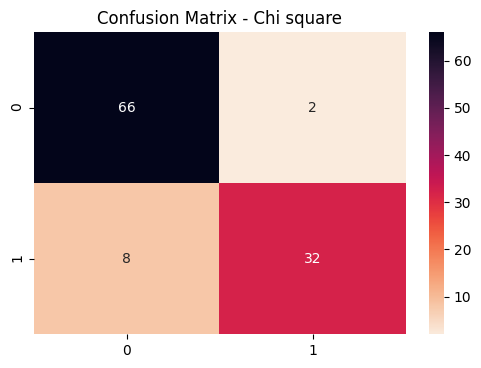

In [43]:
plt.figure(dpi = 100)
plt.title("Confusion Matrix - Chi square")
cf_matrix = confusion_matrix(np.ravel(test[target]), pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

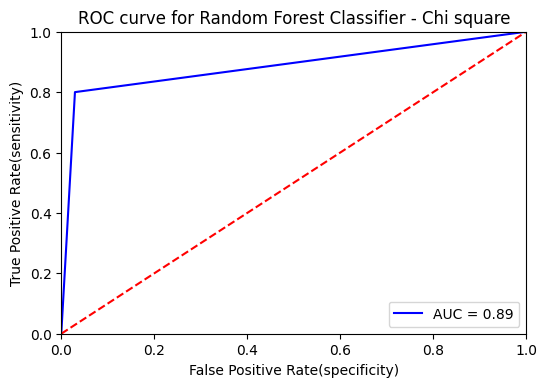

In [44]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test[target], pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for Random Forest Classifier - Chi square')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()

**Information Gain**

---



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


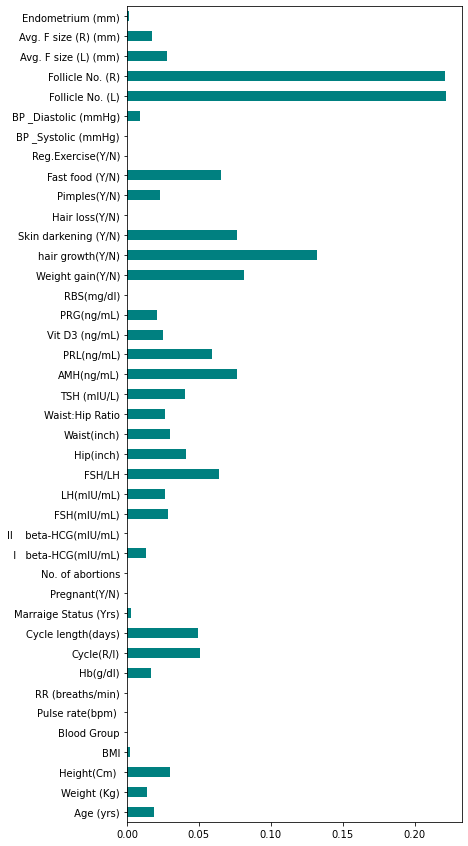

In [45]:
from sklearn.feature_selection import mutual_info_classif


f = plt.figure()
f.set_figheight(15)
importances = mutual_info_classif(pcos[features], pcos[target])
f_imp = pd.Series(importances, pcos.columns[1:])
f_imp.plot(kind='barh', color='teal')
plt.show()

In [46]:
info_gain = [(i, j) for i,j in zip(importances,features) ]
info_gain.sort(reverse=True)
ig_best = info_gain[:30]
ig_features = [i[1] for i in ig_best]
ig_features

['Follicle No. (L)',
 'Follicle No. (R)',
 'hair growth(Y/N)',
 'Weight gain(Y/N)',
 'AMH(ng/mL)',
 'Skin darkening (Y/N)',
 'Fast food (Y/N)',
 'FSH/LH',
 'PRL(ng/mL)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Hip(inch)',
 'TSH (mIU/L)',
 'Height(Cm) ',
 'Waist(inch)',
 'FSH(mIU/mL)',
 'Avg. F size (L) (mm)',
 'Waist:Hip Ratio',
 'LH(mIU/mL)',
 'Vit D3 (ng/mL)',
 'Pimples(Y/N)',
 'PRG(ng/mL)',
 ' Age (yrs)',
 'Avg. F size (R) (mm)',
 'Hb(g/dl)',
 'Weight (Kg)',
 '  I   beta-HCG(mIU/mL)',
 'BP _Diastolic (mmHg)',
 'Marraige Status (Yrs)',
 'BMI']

**Data Transformation - IG**

---



In [47]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, ig_features)])

**Model Training - IG**

---

In [48]:
train, test = train_test_split(pcos, test_size = 0.2, random_state = 0)

observations = pd.DataFrame()
classifier = 'RandomForestClassifier'
model =  RandomForestClassifier(n_estimators=200, random_state=0)

cv = KFold(n_splits=5, random_state=0, shuffle=True)
pipe = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
observations[classifier] = (cross_val_score(pipe, train[ig_features], np.ravel(train[target]), scoring='accuracy', cv=cv))

**Evaluation - IG**

---



In [49]:
mean = pd.DataFrame(observations.mean(), index= [classifier])
observations = pd.concat([observations,mean.T])
observations.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean Accuracy']
observations.T.sort_values(by=['Mean Accuracy'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean Accuracy
RandomForestClassifier,0.895349,0.953488,0.860465,0.918605,0.929412,0.911464


In [50]:
ran_model = RandomForestClassifier(n_estimators=200, random_state=0)
ran_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', ran_model)])
ran_pipe.fit(train[ig_features], np.ravel(train[target]))
pred = ran_pipe.predict(test[ig_features])

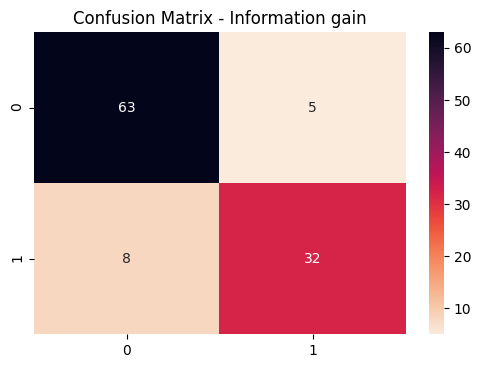

In [51]:
plt.figure(dpi = 100)
plt.title("Confusion Matrix - Information gain")
cf_matrix = confusion_matrix(np.ravel(test[target]), pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')

**ROC CURVE**

This curve plots two parameters: True Positive Rate and False Positive Rate

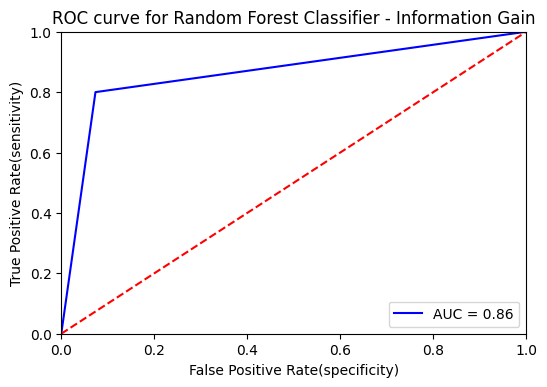

In [52]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test[target], pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for Random Forest Classifier - Information Gain')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()